In [1]:
import numpy as np
from PIL import Image
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.losses import *
from tensorflow.keras.regularizers import *
from tensorflow.keras.initializers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.datasets import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.preprocessing.text import * # new
from tensorflow.keras.preprocessing.sequence import * #new

Sentiment can be learned from a corpus of words. like features being extracted from images using convolutions. this is called embeddings.
these embeddings allow words with simialr properties to be closer in word space.

tensorflow dataservices (tfds) have freely and easily availble data sets to use.

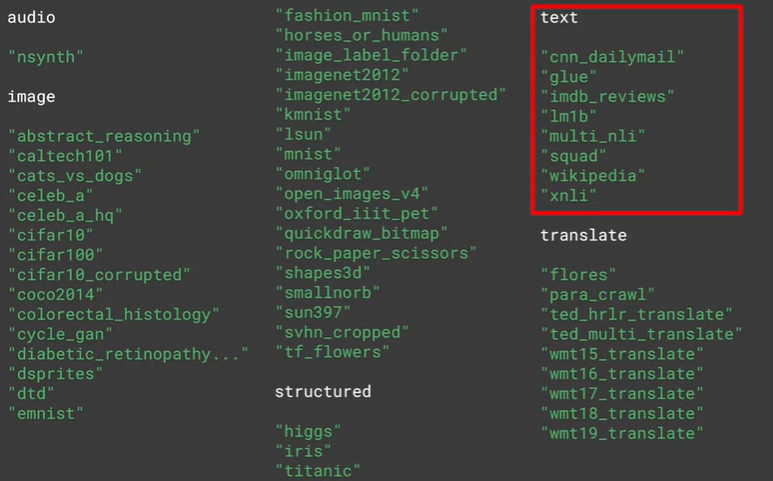

In [3]:
Image.open(r'C:\Users\44788/Desktop\it5.png')

In [2]:
import tensorflow_datasets as tfds

In [3]:
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

In [4]:
train_data, test_data = imdb['train'], imdb['test']

In [5]:
training_sentences = []
training_labels = []
testing_sentences=  []
testing_labels = []

In [6]:
for s,l in train_data:
    training_sentences.append(str(s.numpy())) #calling numpy allows to extract
    training_labels.append(str(l.numpy())) #value from tensors
for s,l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(str(l.numpy()))

what we are converting from - tensors. therefore, we need to convert them to np.arrays

In [94]:
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [99]:
len(test_data)

25000

In [8]:
vocab_size=10000
embedding_dim=16
max_length=120
trunc_type='post'
oov_tok="<OOV>"

tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length,truncating=trunc_type)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length,truncating=trunc_type)

In [29]:
training_labels = training_labels.astype(int)
padded = padded.astype(int)
testing_labels = testing_labels.astype(int)
testing_padded = testing_padded.astype(int)

In [30]:
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    GlobalAveragePooling1D(), # embedding dimension: sentence length by embedding dimension
    Dense(6, activation='relu'), #GBA1D averages across vector to flatten it
    Dense(1, activation='sigmoid')
])

the embeddings in this instance are based on the sentiment of psoitve or negaitve reviews. this is what gives them their vecotr representation. representational space is a representation of word meaning with respect to their sentiment. the NN learns the context of the word. in this instance the task is sentiment classification - so value is encoded in the embedding.

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 102       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 160,109
Trainable params: 160,109
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
num_epochs=3
model.fit(padded,
         training_labels,
         epochs=num_epochs,
         validation_data=(testing_padded, testing_labels))

Epoch 1/3
782/782 [==============================] - 8s 10ms/step - loss: 0.1391 - accuracy: 0.9582 - val_loss: 0.5901 - val_accuracy: 0.8050
Epoch 2/3
782/782 [==============================] - 8s 10ms/step - loss: 0.1262 - accuracy: 0.9634 - val_loss: 0.6332 - val_accuracy: 0.8009
Epoch 3/3
782/782 [==============================] - 8s 10ms/step - loss: 0.1153 - accuracy: 0.9677 - val_loss: 0.7009 - val_accuracy: 0.8002


In [34]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # vocab_size, embedding dims

(10000, 16)


In [35]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [45]:
X = 0
for item in reverse_word_index.items():
    X+=1
    if X > 10:
        break
    else:
        print(item)

(1, '<OOV>')
(2, 'the')
(3, 'and')
(4, 'a')
(5, 'of')
(6, 'to')
(7, 'is')
(8, 'br')
(9, 'in')
(10, 'it')


In [50]:
df = pd.DataFrame(data=weights, columns=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
df.head(10)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.085297,0.001354,0.016071,0.014183,-0.047034,0.004471,-0.064192,-0.053182,-0.013742,0.046961,-0.026754,0.005819,-0.012387,0.074248,0.074797,0.057132
1,-0.063057,0.010705,-0.022856,0.001824,0.006580,0.011544,-0.047515,-0.041986,-0.052371,0.019473,0.011559,0.014564,-0.047037,0.019897,0.004338,0.041701
2,-0.054132,-0.077934,-0.006352,-0.051139,-0.026629,-0.045014,-0.051576,-0.047101,0.007315,-0.009094,-0.008485,0.043896,-0.011502,-0.046513,0.001533,0.016038
3,-0.091534,-0.078940,-0.118568,-0.064641,0.043323,-0.035448,-0.012584,-0.060456,0.074407,0.111638,-0.092169,0.081647,0.002031,-0.041012,0.062726,0.042567
4,-0.041547,-0.010295,-0.003745,0.006018,-0.036551,-0.052179,0.031029,0.002602,-0.026256,0.006171,-0.031668,0.054905,0.006938,-0.032399,0.008706,-0.015924
5,0.022061,-0.015147,-0.128189,0.016265,-0.012277,-0.009857,0.006259,-0.034120,-0.044240,-0.005601,0.021808,-0.038934,-0.068340,-0.000516,0.016208,0.035363
6,0.000318,0.016533,0.039306,0.053232,0.051350,-0.014913,0.025848,0.031490,0.048017,-0.068286,-0.010762,0.008092,0.002511,0.017227,-0.038998,-0.040310
7,-0.082154,-0.061578,-0.033928,-0.008761,0.002177,-0.009929,-0.065187,-0.036053,0.029267,0.002531,-0.062380,0.015169,0.000301,-0.007453,0.085315,0.067252
8,0.065512,-0.001702,0.056490,0.023206,0.020857,-0.024976,-0.018443,0.047938,-0.011269,-0.054966,0.012498,0.023067,-0.009659,0.026371,-0.006860,-0.083757
9,0.005462,-0.074573,-0.046781,-0.030087,-0.026269,-0.074842,-0.000105,-0.023867,-0.003269,0.052120,-0.013372,0.059044,-0.002696,-0.001716,0.070454,0.059775


In [52]:
from sklearn.decomposition import PCA
pca = PCA()
scaled_data = pca.fit_transform(df)
pca_data = pca.transform(scaled_data)

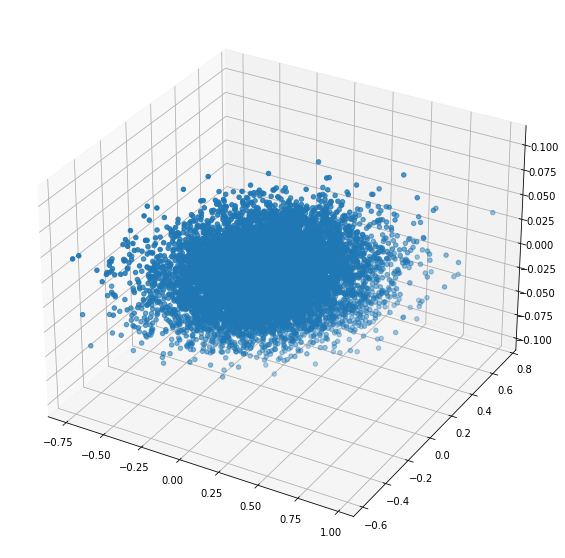

In [70]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_data[:,:1],pca_data[:,1:2],pca_data[:,2:3])

In [82]:
file = r'C:\Users\44788\Desktop\OctaveML\Sarcasm_Headlines_Dataset.json'
import json 
import json
data = [json.loads(line) for line in open(file, 'r')]
sentences = []
labels = []
urls = []
for item in data:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])
    
vocab_size = 10000
embedding_dim = 16
max_length = 32
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 20000

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length,truncating=trunc_type, padding=padding_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length,truncating=trunc_type, padding=padding_type)

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    GlobalAveragePooling1D(), # embedding dimension: sentence length by embedding dimension
    Dense(6, activation='relu'), #GBA1D averages across vector to flatten it
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

training_labels = np.array(training_labels).astype(int)
training_padded = training_padded.astype(int)
testing_labels = np.array(testing_labels).astype(int)
testing_padded = testing_padded.astype(int)

num_epochs=10
history = model.fit(training_padded,
         training_labels,
         epochs=num_epochs,
         validation_data=(testing_padded, testing_labels))

Epoch 1/10
625/625 [==============================] - 4s 6ms/step - loss: 0.6649 - accuracy: 0.5854 - val_loss: 0.4837 - val_accuracy: 0.8240
Epoch 2/10
625/625 [==============================] - 4s 6ms/step - loss: 0.4109 - accuracy: 0.8522 - val_loss: 0.3633 - val_accuracy: 0.8493
Epoch 3/10
625/625 [==============================] - 4s 6ms/step - loss: 0.2904 - accuracy: 0.8913 - val_loss: 0.3407 - val_accuracy: 0.8535
Epoch 4/10
625/625 [==============================] - 4s 6ms/step - loss: 0.2282 - accuracy: 0.9150 - val_loss: 0.3365 - val_accuracy: 0.8557
Epoch 5/10
625/625 [==============================] - 4s 6ms/step - loss: 0.1929 - accuracy: 0.9307 - val_loss: 0.3476 - val_accuracy: 0.8560
Epoch 6/10
625/625 [==============================] - 4s 7ms/step - loss: 0.1641 - accuracy: 0.9396 - val_loss: 0.3595 - val_accuracy: 0.8548
Epoch 7/10
625/625 [==============================] - 4s 7ms/step - loss: 0.1431 - accuracy: 0.9514 - val_loss: 0.3821 - val_accuracy: 0.8480
Epoch 

<AxesSubplot:>

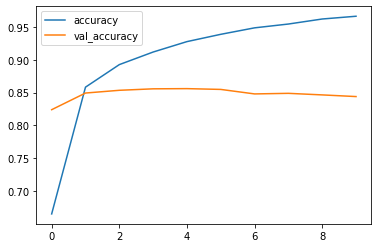

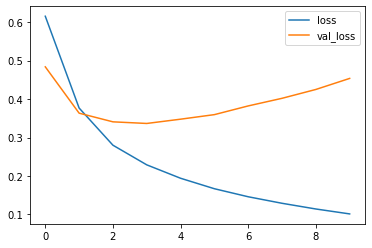

In [83]:
df = pd.DataFrame(history.history)
df.plot(y=['accuracy', 'val_accuracy'])
df.plot(y=['loss', 'val_loss'])